### Steps in Machine Learning Algorithms
* import packages
* Load the i/p data
* Basic checks, EDA & FE
* Define i/p & o/p variables
* Splitting the data into train,test
* Define the model
* Train the model
* Predict the output
* Evaluation
* Visualization

In [2]:
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [22]:
# Loading the i/p
hp = pd.read_csv('Housing.csv')
hp.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Loading the i/p
hp = pd.read_csv('Bengaluru_House_Data.csv')
hp.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [23]:
# Basic checks & EDA
hp.shape

(545, 13)

In [24]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [25]:
# 5 point summary , it gives only statstical information 
hp.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
# To check if any null value present in data
hp.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [27]:
# relation between data which data are highly correlated.
# How one variable is correlated with other variables
hp.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\3186689873.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hp.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [28]:
# Checking correlation with price
hp.corrwith(hp.price)

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\2106161348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hp.corrwith(hp.price)


price        1.000000
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
dtype: float64

In [50]:
# Defineing the i/p & o/p
X= hp.loc[:,['area','bathrooms','stories','bedrooms']]
y = hp[['price']]

In [78]:
# Splitting
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15)

In [79]:
X_train.shape

(408, 2)

In [80]:
X_test.shape

(137, 2)

In [81]:
# Define the model
model = LinearRegression()
model

LinearRegression()

In [82]:
# Training
model.fit(X_train,y_train)

LinearRegression()

In [83]:
y_predict = model.predict(X_test)
y_predict

array([[4800963.49646271],
       [3517664.3863174 ],
       [4417173.10838187],
       [4021389.2706735 ],
       [4457151.27380696],
       [3577631.63445503],
       [6826004.21425264],
       [3301782.29302193],
       [4697020.26635748],
       [3857478.79243065],
       [4657042.1009324 ],
       [6146375.40202615],
       [5856387.06368502],
       [4611067.21069355],
       [4115737.74107671],
       [3889061.54311646],
       [5546702.92064984],
       [3037926.40121635],
       [4157315.0331188 ],
       [6386244.39457667],
       [3217828.14562925],
       [3757533.37886793],
       [6146375.40202615],
       [4896911.09348292],
       [4437162.19109442],
       [4657042.1009324 ],
       [6146375.40202615],
       [3637598.88259266],
       [3777522.46158047],
       [3769526.82849545],
       [3673579.23147524],
       [5202890.69799408],
       [5456605.40943415],
       [3257806.31105433],
       [4605217.12488902],
       [5496583.57485924],
       [5496583.57485924],
 

In [84]:
model.intercept_ # y intercept (c)

array([769018.87433339])

In [85]:
model.coef_ # coefficient

array([[3.99781654e+02, 1.48933330e+06]])

In [86]:
# Evaluation of model
r2_score(y_test,y_predict)

0.48048014388130345

In [87]:
mean_absolute_error(y_test,y_predict)

1011309.2746032344

In [88]:
mean_squared_error(y_test,y_predict)

1841640245772.3696

In [97]:
# Prediction for new i/p
model.predict([[0.193820,1]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2258429.66110737]])

In [98]:
import matplotlib.pyplot as plt

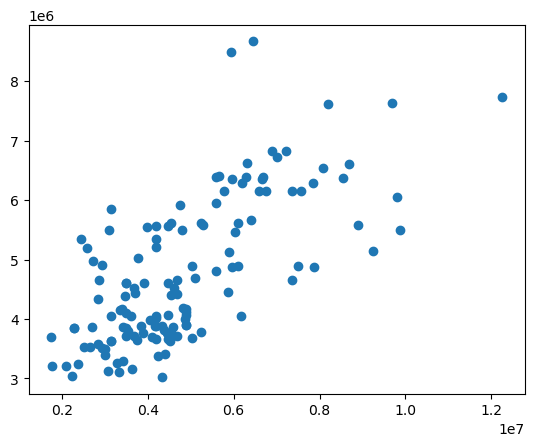

In [99]:
plt.scatter(y_test,y_predict)

* Present data is not linear more number of outliers are present

In [100]:
import seaborn as sns

<Axes: xlabel='price'>

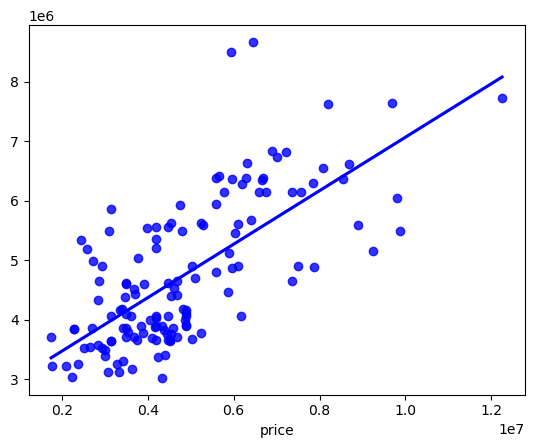

In [101]:
sns.regplot(x=y_test,y=y_predict,ci=None,color="b")

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\3571629358.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\HP\AppData\Local\Temp\ipykernel_5136\3571629358.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y

<Axes: ylabel='Density'>

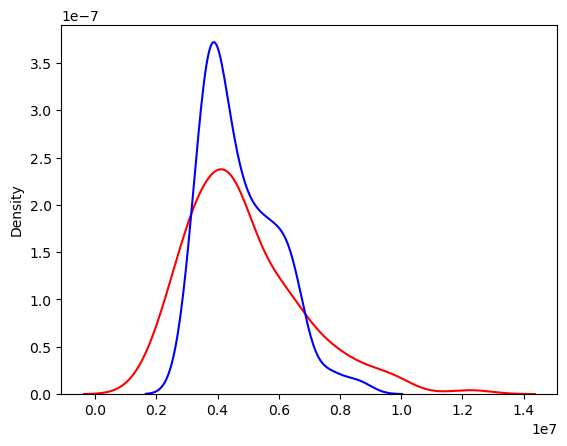

In [102]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_predict, hist=False, color="b", label="Fitted Values")